# S12 T01: Aprenentatge Supervisat - Regressions
## Nivell 1
### Exercici 1
Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import math
import statistics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold


In [8]:
dataset = pd.read_csv('DelayedFlights.csv')


In [9]:

dataset.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [5]:
dataset.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,...,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,3.341651e+06,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,...,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,2.066065e+06,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,...,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.517452e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,...,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.242558e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,...,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,4.972467e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,...,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,7.009727e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,...,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


***Primer analitzem quines columnes poden ser de utilitat per  la predicció i la seva dependencia***

 **Tractem les variables categoriques**


In [6]:
dataset.keys()

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

A simple vista veiem que les variables categoriques no tenen gaire relació amb l'objectiu de predicció pertant podem 
descartar-les


In [3]:
df = dataset.drop(['Unnamed: 0','Origin','TailNum','Dest','UniqueCarrier','CancellationCode'],axis=1, inplace=False)

In [8]:

## obeservem la coorrelacio entre les variables i ArrDelay
correlation = df.corrwith(df['ArrDelay'])


In [9]:
correlation

Year                      NaN
Month               -0.000897
DayofMonth           0.004129
DayOfWeek            0.006123
DepTime              0.127017
CRSDepTime           0.044447
ArrTime             -0.050948
CRSArrTime           0.043078
FlightNum            0.061266
ActualElapsedTime    0.068130
CRSElapsedTime      -0.015676
AirTime             -0.000189
ArrDelay             1.000000
DepDelay             0.952927
Distance            -0.029853
TaxiIn               0.156277
TaxiOut              0.286484
Cancelled                 NaN
Diverted                  NaN
CarrierDelay         0.501773
WeatherDelay         0.264624
NASDelay             0.387606
SecurityDelay       -0.002488
LateAircraftDelay    0.478123
dtype: float64

In [4]:
## a simple vista podem eliminar les columnes year, Cancelled i Diverted ja que no aporten informació rellevant
df.drop(['Year','Cancelled','Diverted'],axis=1,inplace=True)


In [29]:
##  observem la quantitat de nulls 
df.isna().sum()

FlightNum            0
ArrDelay             0
DepDelay             0
TaxiIn               0
TaxiOut              0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [5]:
## imputem els nulls amb la mitja
for x in df.columns:
    df.fillna(df[x].mean(),inplace=True)

In [13]:
## analitzem la correlació de les variables amb el target
corr2 = df.corrwith(df['ArrDelay'])

In [14]:
corr2

Month               -0.001485
DayofMonth           0.004015
DayOfWeek            0.006159
DepTime              0.126777
CRSDepTime           0.044673
ArrTime             -0.043259
CRSArrTime           0.042908
FlightNum            0.061082
ActualElapsedTime    0.072437
CRSElapsedTime      -0.016420
AirTime              0.003885
ArrDelay             1.000000
DepDelay             0.946493
Distance            -0.030545
TaxiIn               0.156039
TaxiOut              0.284491
CarrierDelay         0.513489
WeatherDelay         0.193405
NASDelay             0.407451
SecurityDelay       -0.440240
LateAircraftDelay    0.529015
dtype: float64

In [6]:
## eliminem les columnes on presenten menys correlació 
df.drop(['Month','DayofMonth','DayOfWeek','Distance'],axis=1,inplace=True)

analitzem la multicolinealitat


In [41]:
def vif(df):
    vif = pd.DataFrame()
    vif['variables']=df.columns
    vif['VIF'] = [ variance_inflation_factor(df.values,i)
    for i in range(len(df.columns))]
    return(vif)

In [18]:
vif(df)

,variables,VIF
0,DepTime,63.926794
1,CRSDepTime,63.289451
2,ArrTime,15.372661
3,CRSArrTime,38.274201
4,FlightNum,2.265379
5,ActualElapsedTime,5956.552264
6,CRSElapsedTime,340.731639
7,AirTime,5291.151152
8,ArrDelay,156.667959
9,DepDelay,83.748985


Veiem que les variables:
    ActualElapsedTime
    CRSElapsedTime
    AirTime
Tenen una alta colinealitat indicant que son combinacio lineal de altres variables, es a dir comparteixen dependencia
Per tant eliminem aquestes variables i tornarem a analitzar la colinealitat


In [8]:
df.drop(['ActualElapsedTime','CRSElapsedTime','AirTime','ArrTime'],axis=1,inplace=True)

In [20]:
vif(df)

,variables,VIF
0,DepTime,62.063886
1,CRSDepTime,62.042652
2,CRSArrTime,27.239309
3,FlightNum,2.112225
4,ArrDelay,91.134632
5,DepDelay,30.912126
6,TaxiIn,2.705325
7,TaxiOut,4.400860
8,CarrierDelay,28.265030
9,WeatherDelay,6.605324


In [9]:
## eliminem les columnes  CRSDepTime i CRSArrTime
df.drop(['CRSDepTime','DepTime','CRSArrTime'],axis=1, inplace=True)

In [22]:
vif(df)

,variables,VIF
0,FlightNum,1.944624
1,ArrDelay,83.954472
2,DepDelay,26.708804
3,TaxiIn,2.204984
4,TaxiOut,3.155551
5,CarrierDelay,28.032906
6,WeatherDelay,6.563268
7,NASDelay,17.137569
8,SecurityDelay,2.918938
9,LateAircraftDelay,30.250816


veiem que el valor encara no es acceptable però pot ser degut a la imputacio de nulls  on hem substituit els nulls per la mitja de la columna , cosa que pot generar una relació lineal.
Per tant no eliminarem mes columnes



##### Implementació dels diferents models de regressió

1 Linear Regression


In [7]:
## Mostra aleatoria per el train set
df_sample = df.sample(500000)

NameError: name 'df' is not defined

In [12]:
X = np.array(df_sample.drop(['ArrDelay'],1))


In [13]:
y = np.array(df_sample['ArrDelay'])

In [14]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
model=LinearRegression()

In [27]:
model.fit(X_train,y_train)

LinearRegression()

In [28]:
model.score(X_train,y_train)

0.9844643788062477

In [29]:
model.score(X_test,y_test)

0.9855310838902148

In [30]:
model.intercept_


-7.1415352325456

In [31]:
## predicció
lr_predict =model.predict(X_test)

In [70]:
def PrintActualPredicted(act,pred):
    df_print = pd.DataFrame({'Actual':act,'Predicted':pred})
    return(df_print)


In [33]:
PrintActualPredicted(y_test,lr_predict)

,Actual,Predicted
0,49.0,47.004751
1,-1.0,5.153898
2,15.0,11.950380
3,29.0,26.987913
4,21.0,18.658861
...,...,...
99995,41.0,38.428829
99996,38.0,35.689863
99997,6.0,6.357850
99998,27.0,23.805288


In [35]:
X_addC = sm.add_constant(X)
result = sm.OLS(y, X_addC).fit()
print(result.rsquared, result.rsquared_adj)

0.9846805834771061 0.9846803077220936


In [36]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 3.571e+06
Date:                Tue, 17 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:46:25   Log-Likelihood:            -1.6844e+06
No. Observations:              500000   AIC:                         3.369e+06
Df Residuals:                  499990   BIC:                         3.369e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.8719      0.030   -232.678      0.000      -6.930      -6.814
x1             0.0002   5.14e-06     37.991      0.000       0.000       0.000
x2             0.1834      0.001    240.731      0.000       0.182       0.185
x3             0.1656      0.002     82.684      0.000       0.162       0.170
x4             0.1675      0.001    181.582      0.000       0.166       0.169
x5             0.8281      0.001   1000.127      0.000       0.827       0.830
x6             0.8088      0.001    859.630      0.000       0.807       0.811
x7             0.8413      0.001   1055.729      0.000       0.840       0.843
x8            -2.1053      0.004   -599.527      0.000      -2.112      -2.098
x9             0.8334      0.001    991.639      0.000       0.832       0.835
==============================================================================
Omnibus:                   872703.691   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       7957340832.511
Skew:                          11.508   Prob(JB):                         0.00
Kurtosis:                     620.594   Cond. No.                     8.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Linear Regression Features importance

In [37]:
coef_dict = {}
for coef, feat in zip(model.coef_,df_sample.drop(['ArrDelay'],1)):
    coef_dict[feat] = coef

In [38]:
coef_dict

{'FlightNum': 0.00019824700116951232,
 'DepDelay': 0.19119715899698297,
 'TaxiIn': 0.17238334977211056,
 'TaxiOut': 0.17386979316169784,
 'CarrierDelay': 0.8208110158883013,
 'WeatherDelay': 0.800714871288922,
 'NASDelay': 0.8348581680643608,
 'SecurityDelay': -2.0513864605008987,
 'LateAircraftDelay': 0.8261309825240354}

### 2 Decision Tree Regressor

In [40]:
regressor = DecisionTreeRegressor(random_state=0)

In [41]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [42]:
drt_pred=regressor.predict(X_test)

In [44]:
PrintActualPredicted(y_test,drt_pred)

,Actual,Predicted
0,49.0,48.0
1,-1.0,10.0
2,15.0,15.0
3,29.0,29.0
4,21.0,21.0
...,...,...
99995,41.0,41.0
99996,38.0,38.0
99997,6.0,0.0
99998,27.0,27.0


### Decission Tree Features Importance

In [45]:
np.round(regressor.feature_importances_, 3)

array([0.004, 0.819, 0.002, 0.016, 0.006, 0.002, 0.039, 0.107, 0.006])

In [46]:
coef_dict = {}
for coef, feat in zip(regressor.feature_importances_,df_sample.drop(['ArrDelay'],1)):
    coef_dict[feat] = coef

In [47]:
dict(sorted(coef_dict.items(), key=lambda item: item[1]))

{'TaxiIn': 0.0016167430322980752,
 'WeatherDelay': 0.002315844362671032,
 'FlightNum': 0.0037827238216940973,
 'CarrierDelay': 0.005770775154042516,
 'LateAircraftDelay': 0.0063577567186824425,
 'TaxiOut': 0.015794943631347664,
 'NASDelay': 0.03856167736212056,
 'SecurityDelay': 0.10660572586891677,
 'DepDelay': 0.8191938100482269}

les variables que han tingut més pes son TaxiOut(0.012) NASDelay(0.04) SecurityDelay(0.16) i DepDelay(0.81)

In [286]:
i_col = (df_sample.drop(['ArrDelay'], 1))

NameError: name 'df_sample' is not defined

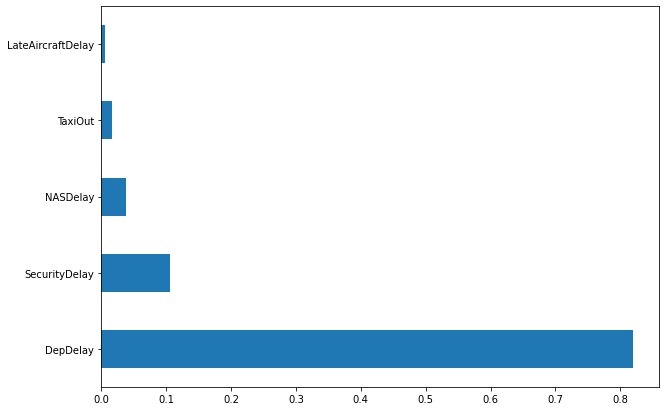

In [49]:
plt.figure(figsize=(10,7))
feat_importances = pd.Series(regressor.feature_importances_, index = i_col.columns)
feat_importances.nlargest(5).plot(kind='barh');

#### 3 Random Forest

In [16]:
rf =RandomForestRegressor(n_estimators = 100, random_state = 42)

In [17]:
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [18]:
rfPred = rf.predict(X_test)

In [21]:
PrintActualPredicted(y_test,rfPred)

,Actual,Predicted
0,89.0,89.00
1,0.0,1.54
2,17.0,17.00
3,42.0,42.00
4,36.0,36.00
...,...,...
99995,4.0,9.08
99996,14.0,6.61
99997,31.0,31.00
99998,28.0,28.00


In [42]:
rf.feature_importances_

array([0.00389741, 0.82820969, 0.00179403, 0.01388401, 0.00581713,
       0.00252216, 0.04147347, 0.09630376, 0.00609833])

In [43]:
i_col = (df_sample.drop(['ArrDelay'],1))

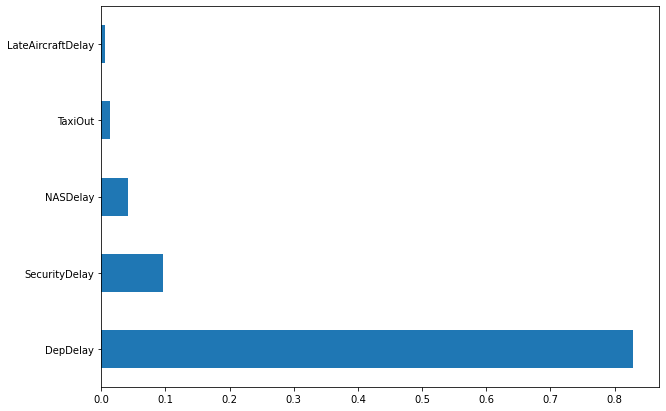

In [44]:
plt.figure(figsize=(10,7))
feat_importances = pd.Series(rf.feature_importances_, index = i_col.columns)
feat_importances.nlargest(5).plot(kind='barh');

## Exercici 2
Compara’ls en base al MSE i al R2 .

In [5]:
from sklearn import metrics

***Linear Regression***

In [46]:
print('MSE:',metrics.mean_squared_error(y_test,lr_predict))
print('MAE:',metrics.mean_absolute_error(y_test,lr_predict))
print('r2:',metrics.r2_score(y_test,lr_predict))

MSE: 47.200703448232915
MAE: 3.775375036925413
r2: 0.9848154746516669


***Decision Tree Regression***

In [47]:
print('MSE:',metrics.mean_squared_error(y_test,drt_pred))
print('MAE:',metrics.mean_absolute_error(y_test,drt_pred))
print('R2:',metrics.r2_score(y_test,drt_pred))

MSE: 51.12469709493641
MAE: 3.3917147219812693
R2: 0.9835531209865267


***Random forest***

In [48]:
print('MSE:',metrics.mean_squared_error(y_test,rfPred))
print('MAE:',metrics.mean_absolute_error(y_test,rfPred))
print('R2:',metrics.r2_score(y_test,rfPred))

MSE: 27.56304793900107
MAE: 2.5504596791583136
R2: 0.9911329329960917


### Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten

***Linear Regression***

In [57]:
 ## canviarem el parametre  normalize a true 
clf = LinearRegression(normalize=True)

In [58]:
clf.fit(X_train,y_train)

LinearRegression(normalize=True)

In [59]:
clf.score(X_train,y_train)

0.9844643788062477

In [60]:
clf.score(X_test,y_test)

0.9855310838902148

ara provem de canviar el parametre intercept a false ,d'aquesta manera el parametre normalize canvia a false automaticament
 tambe utilitzarem el maxim de processadors disponibles

In [61]:
### ara provem de canviar el parametre intercept a false ,d'aquesta manera el parametre normalize canvia a false automaticament
## tambe utilitzarem el maxim de processadors disponibles
clf2 =LinearRegression(fit_intercept = False,n_jobs=-1)

In [62]:
clf2.get_params()

{'copy_X': True,
 'fit_intercept': False,
 'n_jobs': -1,
 'normalize': False,
 'positive': False}

In [63]:
clf2.fit(X_train,y_train)

LinearRegression(fit_intercept=False, n_jobs=-1)

In [64]:
clf2.score(X_train,y_train)

0.9826735564034903

In [65]:
clf2.score(X_test,y_test)

0.98442371262414

In [66]:
lr_predict =clf.predict(X_test)
lr2_predict=clf2.predict(X_test)

In [67]:
PrintActualPredicted(y_test,lr_predict)

,Actual,Predicted
0,49.0,47.004751
1,-1.0,5.153898
2,15.0,11.950380
3,29.0,26.987913
4,21.0,18.658861
...,...,...
99995,41.0,38.428829
99996,38.0,35.689863
99997,6.0,6.357850
99998,27.0,23.805288


In [68]:
PrintActualPredicted(y_test,lr2_predict)

,Actual,Predicted
0,49.0,48.717389
1,-1.0,5.682429
2,15.0,13.475111
3,29.0,29.272985
4,21.0,21.305284
...,...,...
99995,41.0,39.947696
99996,38.0,36.899836
99997,6.0,8.021713
99998,27.0,24.146369


observem que l'experiment amb diferents parametres no exposa una diferencia notable

finalment provem amb el parametre positive=true

In [69]:
clf3 =LinearRegression(positive=True)

In [70]:
clf3.fit(X_train,y_train)

LinearRegression(positive=True)

In [71]:
clf3.score(X_train,y_train)

0.97389323167039

In [72]:
clf3.score(X_test,y_test)

0.9727310657153028

In [73]:
lr3_pred =clf3.predict(X_test)

In [74]:
PrintActualPredicted(y_test,lr3_pred)

,Actual,Predicted
0,49.0,42.880650
1,-1.0,9.172335
2,15.0,6.590371
3,29.0,21.718367
4,21.0,13.194487
...,...,...
99995,41.0,34.472797
99996,38.0,31.569736
99997,6.0,11.464177
99998,27.0,18.671472


In [79]:
print('lr3 MSE:',metrics.mean_squared_error(y_test,lr3_pred))
print('lr3 MAE:',metrics.mean_absolute_error(y_test,lr3_pred))
print('lr3 r2:',metrics.r2_score(y_test,lr3_pred))

lr3 MSE: 85.69641483751292
lr3 MAE: 7.091484341325263
lr3 r2: 0.9727310657153028


In [80]:
print('lr2 MSE:',metrics.mean_squared_error(y_test,lr2_predict))
print('lr2 MAE:',metrics.mean_absolute_error(y_test,lr2_predict))
print('lr2 r2:',metrics.r2_score(y_test,lr2_predict))

lr2 MSE: 48.9506473063416
lr2 MAE: 3.3343288889617684
lr2 r2: 0.98442371262414


In [84]:
print('lr1 MSE:',metrics.mean_squared_error(y_test,lr_predict))
print('lr1 MAE:',metrics.mean_absolute_error(y_test,lr_predict))
print('lr1 r2:',metrics.r2_score(y_test,lr_predict))

lr1 MSE: 45.47057924039048
lr1 MAE: 3.7905794469787053
lr1 r2: 0.9855310838902148


veiem que al anant canviant parametres ha anat enpitjorant les metriques

***Decision Tree Regression canviant parametres***

les variables que podem ajustar son:
* min samples split (augmentar el minim de samples a tenir enconte per fer la divisio pot prevenir-nos de overfitting però si ens ens pasem causara underfitting)
* min samples leaf ( quantitat requerida per formar un node o leaf, bastant semblant al split)
* max features (nombre de features a considerar per fer un split)
* max depth (llargada maxima del l'arbre)

In [26]:
max_depth = np.linspace(1,20,20,endpoint=True)
min_samples_split = np.linspace(0.01,1,10,endpoint=True)
train_result = []
test_result = []
parameters={'max_depth':max_depth,
           'min_samples_split':min_samples_split,
           'max_features':list(range(1,df_sample.shape[1])),
           'min_samples_leaf':np.linspace(0.001,0.5,10,endpoint=True),
           'splitter':['best','random'],
           'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5],
            'max_leaf_nodes':[None,10,20,30,40,50,60,70,80,90]
           }


In [35]:
def Plot (feature):
    plt.figure(figsize=(10,7))
    line1 = plt.plot(parameters[feature],train_result,'g',label='MSE train')
    line2 = plt.plot(parameters[feature],test_result,'r',label='MSE test')
    plt.title(feature+' variation')
    plt.xlabel(feature)
    plt.ylabel('MSE')
    plt.legend()
    return 


In [27]:

for depth in parameters['max_depth']:
    dt = DecisionTreeRegressor(max_depth=depth)
    dt.fit(X_train,y_train)
    train_predict=dt.predict(X_train)
    train_result.append(metrics.mean_squared_error(y_train,train_predict))
    y_predict = dt.predict(X_test)
    test_result.append(metrics.mean_squared_error(y_test,y_predict))


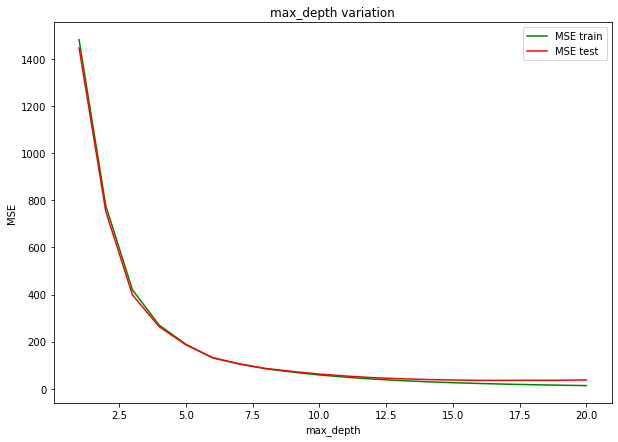

In [36]:
Plot('max_depth')

In [31]:

print(min_samples_split)
train_result = []
test_result = []
for split in parameters['min_samples_split']:
    dt = DecisionTreeRegressor(min_samples_split=round(split,2))
    dt.fit(X_train,y_train)
    train_predict=dt.predict(X_train)
    train_result.append(round(metrics.mean_squared_error(y_train,train_predict),2))
    y_predict = dt.predict(X_test)
    test_result.append(round(metrics.mean_squared_error(y_test,y_predict),2))


[0.01 0.12 0.23 0.34 0.45 0.56 0.67 0.78 0.89 1.  ]


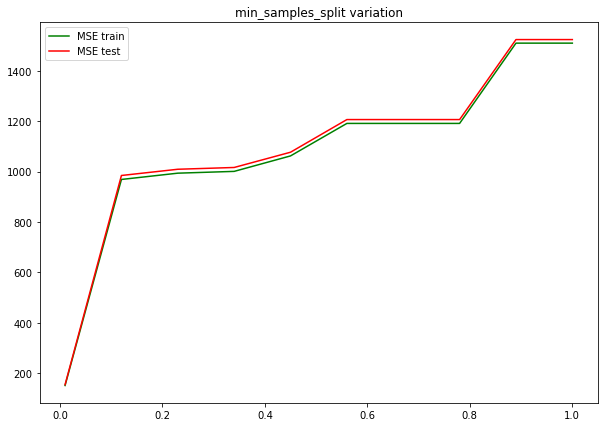

In [32]:
Plot('min_samples_split')

In [33]:
min_samples_leafs = np.linspace(0.001, 0.5, 20, endpoint=True)

train_result = []
test_result = []
for leaf in parameters['min_samples_leaf']:
    dt = DecisionTreeRegressor(min_samples_leaf=leaf)
    dt.fit(X_train,y_train)
    train_predict=dt.predict(X_train)
    train_result.append(metrics.mean_squared_error(y_train,train_predict))
    y_predict = dt.predict(X_test)
    test_result.append(metrics.mean_squared_error(y_test,y_predict))

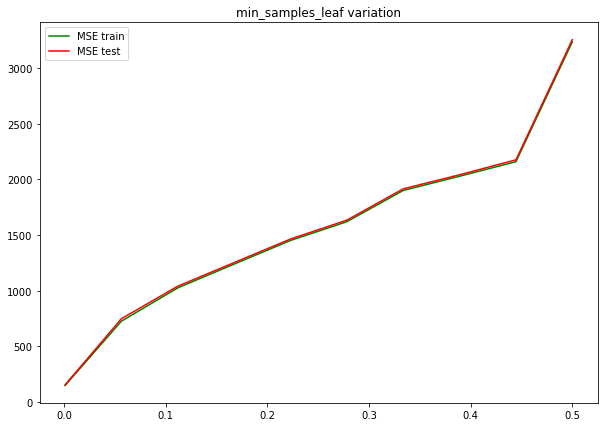

In [34]:
Plot('min_samples_leaf')

In [252]:

print(parameters['max_features'])
max_features = list(range(1,df_sample.shape[1]))
train_result = []
test_result = []
for feature in max_features:
    dt = DecisionTreeRegressor(max_features=feature)
    dt.fit(X_train,y_train)
    train_predict=dt.predict(X_train)
    train_result.append(metrics.mean_squared_error(y_train,train_predict))
    y_predict = dt.predict(X_test)
    test_result.append(metrics.mean_squared_error(y_test,y_predict))

[1, 2, 3, 4, 5, 6, 7, 8, 9]


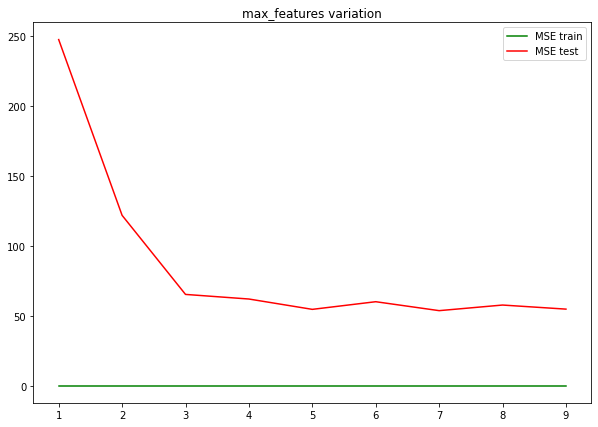

In [253]:
Plot('max_features')

In [37]:
max_features_cat =['auto','log2','sqrt',None]
train_result_cat = []
test_result_cat = []
for feature_cat in max_features_cat:
    dt=DecisionTreeRegressor(max_features=feature_cat)
    dt.fit(X_train,y_train)
    train_predict=dt.predict(X_train)
    train_result_cat.append(metrics.mean_squared_error(y_train,train_predict))
    y_predict = dt.predict(X_test)
    test_result_cat.append(metrics.mean_squared_error(y_test,y_predict))

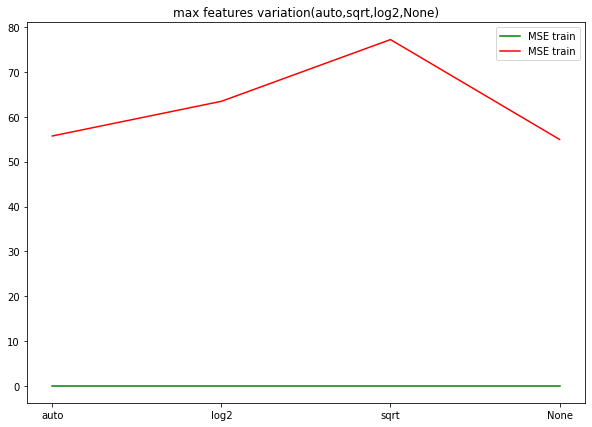

In [38]:
x_arr=list(range(0,4))
max_features_cat_ticks =['auto','log2','sqrt','None']
plt.figure(figsize=(10,7))
line1 = plt.plot(x_arr,train_result_cat,'g',label='MSE train')
line2 = plt.plot(x_arr,test_result_cat,'r',label='MSE train')
plt.title('max features variation(auto,sqrt,log2,None)')
plt.xticks(range(0,len(max_features_cat_ticks)), max_features_cat_ticks)

plt.legend()

In [39]:

train_result= []
test_result = []
for fraction_leaf in parameters['min_weight_fraction_leaf']:
    dt=DecisionTreeRegressor(min_weight_fraction_leaf=fraction_leaf)
    dt.fit(X_train,y_train)
    train_predict=dt.predict(X_train)
    train_result.append(metrics.mean_squared_error(y_train,train_predict))
    y_predict = dt.predict(X_test)
    test_result.append(metrics.mean_squared_error(y_test,y_predict))

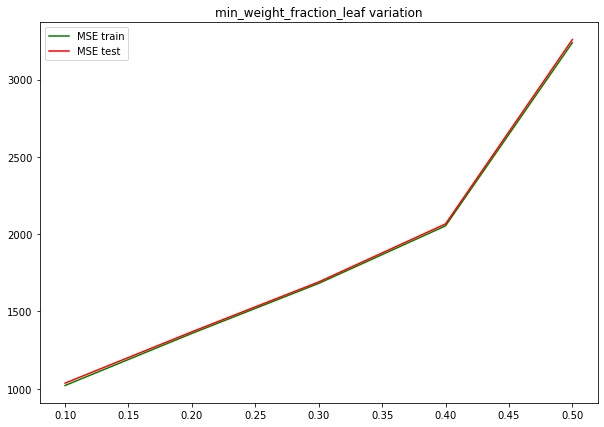

In [40]:
Plot('min_weight_fraction_leaf')

In [56]:
train_result= []
test_result = []
for splt in parameters['splitter']:
    dt=DecisionTreeRegressor(splitter =splt)
    dt.fit(X_train,y_train)
    train_predict=dt.predict(X_train)
    train_result.append(metrics.mean_squared_error(y_train,train_predict))
    y_predict = dt.predict(X_test)
    test_result.append(metrics.mean_squared_error(y_test,y_predict))

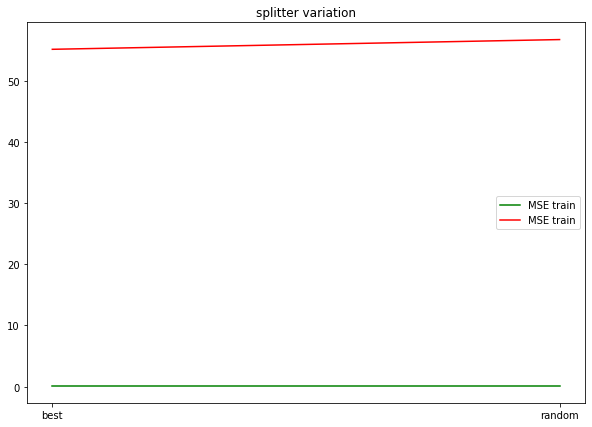

In [57]:
plt.figure(figsize=(10,7))
line1 = plt.plot(parameters['splitter'],train_result,'g',label='MSE train')
line2 = plt.plot(parameters['splitter'],test_result,'r',label='MSE train')
plt.title('splitter variation')
plt.xticks(range(0,len(parameters['splitter'])), parameters['splitter'])
plt.legend()

In [98]:
train_result= []
test_result = []
for leaf_node in parameters['max_leaf_nodes']:
    dt=DecisionTreeRegressor(max_leaf_nodes =leaf_node)
    dt.fit(X_train,y_train)
    train_predict=dt.predict(X_train)
    train_result.append(metrics.mean_squared_error(y_train,train_predict))
    y_predict = dt.predict(X_test)
    test_result.append(metrics.mean_squared_error(y_test,y_predict))

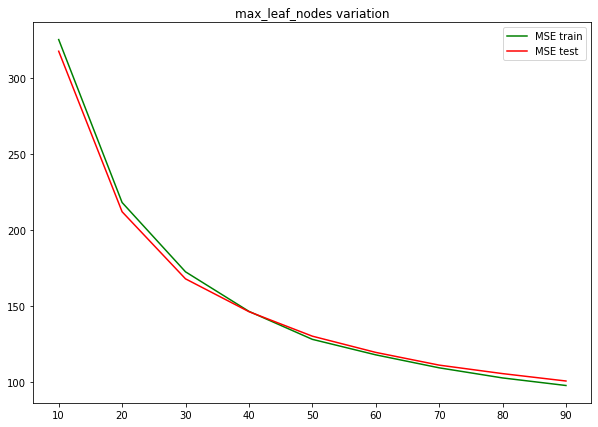

In [99]:
Plot('max_leaf_nodes')

analitzant les grafiques veiem quina es la millor combinació de parametres

In [274]:
dt=DecisionTreeRegressor(splitter='best', min_weight_fraction_leaf=0.0,
                         max_leaf_nodes=1000,
                         max_features=9)

In [275]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_features=9, max_leaf_nodes=1000)

In [276]:
dt_predict= dt.predict(X_test)

In [277]:
print('Mae:',metrics.mean_absolute_error(y_test,dt_predict))
print('MSE:',metrics.mean_squared_error(y_test,dt_predict))
print('R2:',metrics.r2_score(y_test,dt_predict))

Mae: 4.113439936524541
MSE: 45.10215866728131
R2: 0.9861576554381618


In [280]:
PrintActualPredicted(y_test,dt_predict)

,Actual,Predicted
0,89.0,93.339161
1,0.0,7.851014
2,17.0,17.741797
3,42.0,41.322561
4,36.0,34.740993
...,...,...
99995,4.0,6.029847
99996,14.0,6.029847
99997,31.0,32.189941
99998,28.0,30.316022


**Random forest canviant parametres**

In [278]:
rf = RandomForestRegressor(random_state = 42)

In [279]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

**Nº Trees in the forest**

In [67]:
trees = np.array(range(10,1015,200))

In [68]:
trees

array([  10,  210,  410,  610,  810, 1010])

In [69]:
train_result = []
test_result = []
for tree in trees:
    rf = RandomForestRegressor(n_estimators= tree, random_state = 42,n_jobs=-1)
    rf.fit(X_train,y_train)
    train_predict=rf.predict(X_train)
    train_result.append(metrics.mean_squared_error(y_train,train_predict))
    y_predict = rf.predict(X_test)
    test_result.append(metrics.mean_squared_error(y_test,y_predict))
    

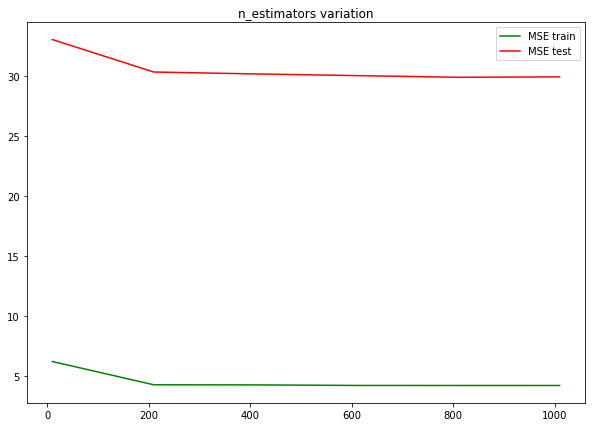

In [71]:

plt.figure(figsize=(10,7))
line1 = plt.plot(trees,train_result,'g',label='MSE train')
line2 = plt.plot(trees,test_result,'r',label='MSE test')
plt.title('n_estimators variation')
plt.legend()
    


In [72]:
PrintActualPredicted(y_test,y_predict)

,Actual,Predicted
0,6.0,5.315842
1,5.0,1.201320
2,36.0,36.122772
3,306.0,304.962376
4,2.0,8.108911
...,...,...
99995,24.0,23.971287
99996,14.0,-1.227888
99997,13.0,7.031683
99998,28.0,26.961386


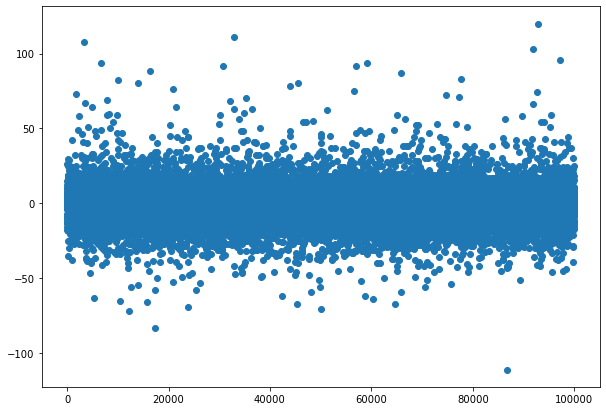

In [37]:
plt.figure(figsize=(10,7))
plt.plot(y_test - y_predict,marker='o',linestyle='')

donat l'alt temps de processament,provem  el RandomizedSearchCV  per trobar la millor combinació de parametres


In [7]:
from sklearn.model_selection import RandomizedSearchCV

In [17]:
n_estimators = [int(x) for x in np.linspace(100,1200,12)]
max_features = ['auto','sqrt']
max_depth = [x for x in np.linspace(5,40,8)]
min_samples_split= [2,4,16,32,64,128]
min_samples_leaf = [1,3,5,7,9,11]
bootstrap = [True, False]
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'bootstrap':bootstrap
}

In [18]:
random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 16, 32, 64, 128],
 'min_samples_leaf': [1, 3, 5, 7, 9, 11],
 'bootstrap': [True, False]}

In [19]:
rf =RandomForestRegressor()

In [20]:
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid,
                               n_iter = 2, cv = 3, verbose=2, 
                               random_state=42)

In [21]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=7, min_samples_split=32, n_estimators=1100; total time=25.7min
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=7, min_samples_split=32, n_estimators=1100; total time=19.5min
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=7, min_samples_split=32, n_estimators=1100; total time=19.8min
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time= 7.0min
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time= 6.7min
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time= 6.0min


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=2,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11],
                                        'min_samples_split': [2, 4, 16, 32, 64,
                                                              128],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

un cop s'ha executat el randomizer tenim  un total de 6 fits amb valors aleatoris , procedim a evaluar-los

In [8]:



def evaluation(model, X_test, y_test):
    y_predict = model.predict(X_test)
    print(' MSE:',metrics.mean_squared_error(y_test,y_predict))
    print(' MAE:',metrics.mean_absolute_error(y_test,y_predict))
    print('r2:',metrics.r2_score(y_test,y_predict))
    
    
    return 

In [59]:
base_model = RandomForestRegressor(n_estimators=10,random_state=42)
base_model.fit(X_train,y_train)
base_metrics = evaluation(base_model,X_test,y_test)


 MSE: 35.390794601681286
 MAE: 2.6771766377219657
r2: 0.9890045638663595


In [60]:
best_random = rf_random.best_estimator_
random_metrics = evaluation(best_random,X_test,y_test)


 MSE: 44.34213427167796
 MAE: 2.6952544480391074
r2: 0.9862235049848137


observem que amb el randomizer obtenim pitjors metriques , segurament donat que només hem fet 2 iteracions ja que fer-ne mes
resultava molt temps computacional , potser aquest algoritme es eficaç amb moltes més iteracions i executat en algun en cluster server on hi ha molta mes velocitat de processament


## Exercici 4

Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)

***Cross validation***

***Linear regression***

In [64]:
lr_reg = LinearRegression()

In [70]:
lr_reg.fit(X_train,y_train)

LinearRegression()

In [71]:
y_predict =lr_reg.predict(X_test)

In [78]:
cv_r2_score_lr = cross_val_score(lr_reg,X,y,cv=5,scoring='r2')
print(cv_r2_score_lr)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_score_lr)))

[0.98227511 0.98330584 0.98392101 0.98322866 0.98388756]
Mean 5-Fold R Squared: 0.9833236345536909


In [81]:
cv_mse_score_lr = cross_val_score(lr_reg,X,y,cv=5,scoring='neg_mean_squared_error')
print(cv_mse_score_lr)
print(" Linear regression Mean 5-Fold MSE: {}".format(np.mean(cv_mse_score_lr)))

[-58.93271149 -52.18704741 -51.41291586 -53.21918813 -50.20411354]
Mean 5-Fold MSE: -53.191195286524454


***Decision Tree Regressor***

In [85]:
dt_reg = DecisionTreeRegressor()


In [86]:
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [89]:
y_dt_predict=dt_reg.predict(X_test)

In [99]:
cv_r2_score_dt = cross_val_score(dt_reg,X,y,cv=5,scoring='r2')
print(cv_r2_score_dt)
print('Decision Tree Regression Mean 5-Fold R squared:{}'.format(np.mean(cv_r2_score_dt)))

[0.97675526 0.98380228 0.98352236 0.9838891  0.9824116 ]
Decision Tree Regression Mean 5-Fold R squared:0.982076120132648


In [ ]:
cv_mse_score_dt = cross_val_score(dt_reg,X,y,cv=5,scoring='neg_mean_squared_error')
print(cv_mse_score_dt)
print('Decision Tree Regression Mean 5-Fold MSE:{}'.format(np.mean(cv_mse_score_dt)))

***Random Forest Regressor***

In [40]:
rf = RandomForestRegressor()

In [41]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [43]:
cv_r2_score_rf = cross_val_score(rf,X,y,cv=5,scoring='r2')
print(cv_r2_score_rf)
print('Decision Tree Regression Mean 5-Fold R squared:{}'.format(np.mean(cv_r2_score_rf)))

[0.98909942 0.98997986 0.99075678 0.9915152  0.99122178]
Decision Tree Regression Mean 5-Fold R squared:0.9905146082786969


In [44]:
cv_mse_score_rf = cross_val_score(rf,X,y,cv=5,scoring='neg_mean_squared_error')
print(cv_mse_score_rf)
print('Decision Tree Regression Mean 5-Fold MSE:{}'.format(np.mean(cv_mse_score_rf)))

[-34.5471454  -31.91224417 -29.10248462 -26.78667016 -27.94378457]
Decision Tree Regression Mean 5-Fold MSE:-30.058465784476272


conclusió: comparant els tres models diferents veiem que  el model de Random Forest  te les millors metriques

## Nivell 2
### Exercici
Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

Per poder fer processos d'enginyeria tornarem a importar tota la base de dades completa

In [121]:
df= pd.read_csv('DelayedFlights.csv')

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

estudiarem una mica més en profunditat les variables

In [129]:
df_delays=df[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','ArrDelay','DepDelay']]
df_delays.tail()

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrDelay,DepDelay
1936753,3.0,0.0,0.0,0.0,22.0,25.0,30.0
1936754,0.0,57.0,18.0,0.0,0.0,75.0,57.0
1936755,1.0,0.0,19.0,0.0,79.0,99.0,80.0
1936756,NaN,NaN,NaN,NaN,NaN,9.0,11.0
1936757,NaN,NaN,NaN,NaN,NaN,-5.0,7.0


In [133]:
df[['AirTime','CRSElapsedTime','ActualElapsedTime']]

,AirTime,CRSElapsedTime,ActualElapsedTime
0,116.0,150.0,128.0
1,113.0,145.0,128.0
2,76.0,90.0,96.0
3,77.0,90.0,90.0
4,87.0,115.0,101.0
...,...,...,...
1936753,120.0,152.0,147.0
1936754,78.0,109.0,127.0
1936755,122.0,143.0,162.0
1936756,89.0,117.0,115.0


In [130]:
df.tail()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1936757,7009727,2008,12,13,6,1110.0,1103,1413.0,1418,DL,...,8.0,11.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Podem observar que  la la resta de arrTime i CRSArrTime dona el valor de ArrDelay quan CarrierDelay	WeatherDelay NASDelay	SecurityDelay	LateAircraftDelay DepDelay son Nules

In [136]:
df.loc[:,'ElapsedTimeDelay']=df['CRSElapsedTime']-df['ActualElapsedTime']

In [137]:
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ElapsedTimeDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,22.0
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,17.0
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN,-6.0
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,0.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0,5.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0,-18.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0,-19.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2.0


Hem afegit una columna nova amb el retras del vol de la resta de les variables ElapsedTime i CRSElapsed time i veiem que tenen molta correlació amb Arrdelay ka que per exemple en la primera entrada si restem ElapsedTimeDelay de DepDelay ens dona ArrDelay 22-8 =14

Procedim processar les variables categoriques per veure si poden donar més informació

Per la variable UniqueCarrier,Origin,Dest,TailNum aplicarem label encoding

In [138]:
encoder = LabelEncoder()

In [139]:
df['UniqueCarrier'].unique()

array(['WN', 'XE', 'YV', 'OH', 'OO', 'UA', 'US', 'DL', 'EV', 'F9', 'FL',
       'HA', 'MQ', 'NW', '9E', 'AA', 'AQ', 'AS', 'B6', 'CO'], dtype=object)

In [140]:

df['UniqueCarrier']=encoder.fit_transform(df['UniqueCarrier'])

In [141]:
df['Origin']=encoder.fit_transform(df['Origin'])
df['Dest']=encoder.fit_transform(df['Dest'])

In [142]:
df['TailNum']=encoder.fit_transform(df['TailNum'])

In [143]:
df.drop(['CancellationCode','Cancelled'],axis=1,inplace=True)

aquest cop imputarem els nulls amb 0

In [146]:
df=df.fillna(0)

Transformem la variable DayOfWeek a un cicle de cosinus 

In [148]:
df_tmp=pd.DataFrame()
df_tmp['DayOfWeek_cos'] = np.cos(2 * np.pi * df['DayOfWeek']/df['DayOfWeek'].max())

In [149]:
df.insert(5,'DayOfWeek_cos',df_tmp['DayOfWeek_cos'])

In [150]:
df.drop(['Unnamed: 0','Year','Month','DayofMonth','DayOfWeek'],axis=1,inplace=True)

In [151]:
df.head()

,DayOfWeek_cos,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,...,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ElapsedTimeDelay
0,-0.900969,2003.0,1955,2211.0,2225,17,335,3761,128.0,150.0,...,810,4.0,8.0,0,0.0,0.0,0.0,0.0,0.0,22.0
1,-0.900969,754.0,735,1002.0,1000,17,3231,4121,128.0,145.0,...,810,5.0,10.0,0,0.0,0.0,0.0,0.0,0.0,17.0
2,-0.900969,628.0,620,804.0,750,17,448,1953,96.0,90.0,...,515,3.0,17.0,0,0.0,0.0,0.0,0.0,0.0,-6.0
3,-0.900969,1829.0,1755,1959.0,1925,17,3920,2134,90.0,90.0,...,515,3.0,10.0,0,2.0,0.0,0.0,0.0,32.0,0.0
4,-0.900969,1940.0,1915,2121.0,2110,17,378,3844,101.0,115.0,...,688,4.0,10.0,0,0.0,0.0,0.0,0.0,0.0,14.0


In [152]:
df.head()

,DayOfWeek_cos,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,...,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ElapsedTimeDelay
0,-0.900969,2003.0,1955,2211.0,2225,17,335,3761,128.0,150.0,...,810,4.0,8.0,0,0.0,0.0,0.0,0.0,0.0,22.0
1,-0.900969,754.0,735,1002.0,1000,17,3231,4121,128.0,145.0,...,810,5.0,10.0,0,0.0,0.0,0.0,0.0,0.0,17.0
2,-0.900969,628.0,620,804.0,750,17,448,1953,96.0,90.0,...,515,3.0,17.0,0,0.0,0.0,0.0,0.0,0.0,-6.0
3,-0.900969,1829.0,1755,1959.0,1925,17,3920,2134,90.0,90.0,...,515,3.0,10.0,0,2.0,0.0,0.0,0.0,32.0,0.0
4,-0.900969,1940.0,1915,2121.0,2110,17,378,3844,101.0,115.0,...,688,4.0,10.0,0,0.0,0.0,0.0,0.0,0.0,14.0


***Featuring selection***

In [153]:
df_s = df.sample(100000)

In [154]:
df.keys()

Index(['DayOfWeek_cos', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime',
       'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'TaxiIn', 'TaxiOut', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'ElapsedTimeDelay'],
      dtype='object')

In [155]:
X = df_s.drop(['ArrDelay'],axis=1)
y = df_s['ArrDelay']

***Parwise correlation***

In [170]:
corrMatrix=df.corr()

<AxesSubplot:>

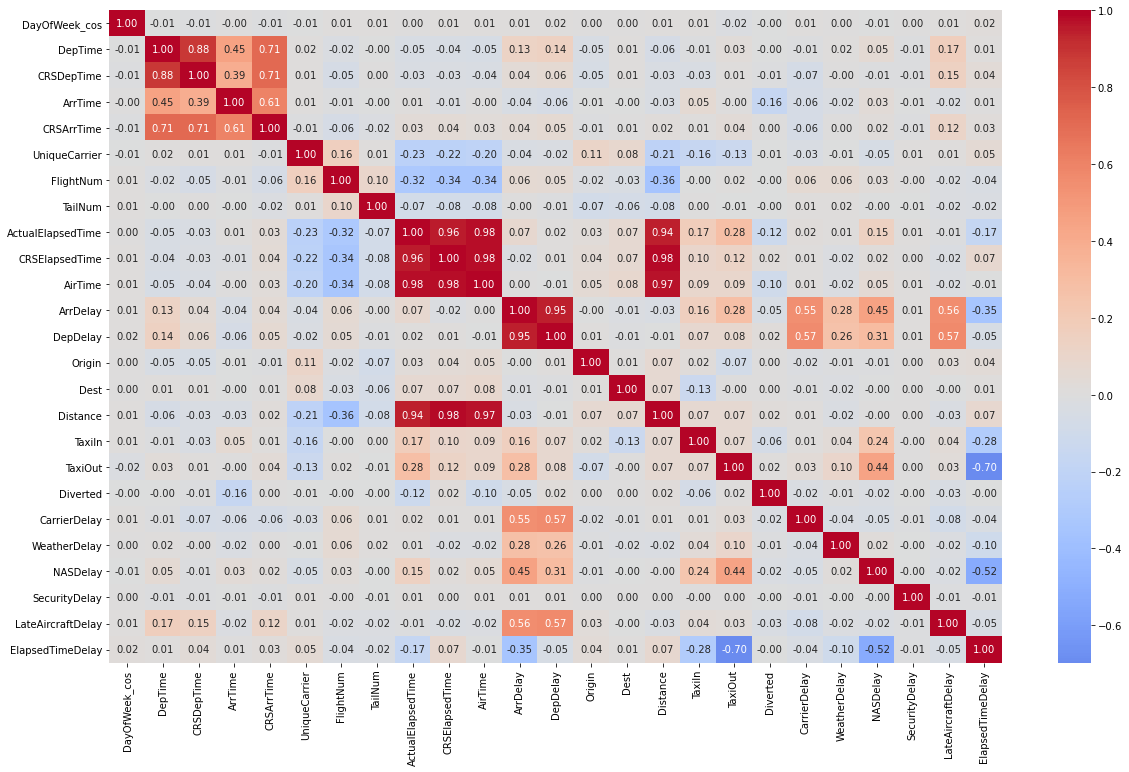

In [171]:
plt.figure(figsize=(20,12))


sns.heatmap(corrMatrix, center=0, annot=True, 
                fmt='.2f', cmap='coolwarm')

<AxesSubplot:>

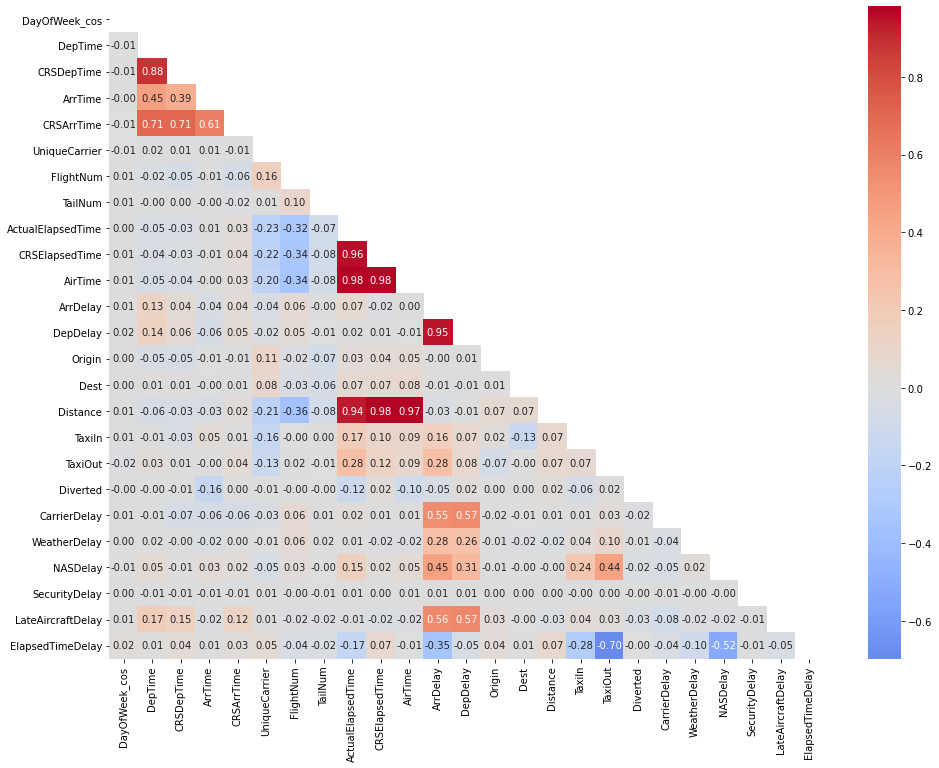

In [172]:
plt.figure(figsize=(16,12))

mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
sns.heatmap(corrMatrix, mask=mask, center=0, annot=True,
             fmt='.2f', cmap='coolwarm')

veiem que DepDelay te una correlacio del 95% amb el target i per sota  totes les variables de delay tambe mostren correlacio

In [182]:
corrMatrix=X.corr()
corrMatrix=corrMatrix.abs()

In [183]:
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
reduced_matrix = corrMatrix.mask(mask)

In [184]:
reduced_matrix

,DayOfWeek_cos,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,...,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ElapsedTimeDelay
DayOfWeek_cos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DepTime,0.011100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRSDepTime,0.013070,0.880277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ArrTime,0.002070,0.448883,0.386706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRSArrTime,0.010910,0.716469,0.716124,0.597087,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UniqueCarrier,0.008664,0.015763,0.012688,0.005005,0.013198,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FlightNum,0.005460,0.027311,0.056050,0.013684,0.061975,0.157470,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TailNum,0.006680,0.007361,0.001780,0.000736,0.017616,0.001535,0.101405,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ActualElapsedTime,0.009395,0.040377,0.028724,0.013416,0.042419,0.232104,0.320820,0.070510,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRSElapsedTime,0.013889,0.039695,0.022335,0.008407,0.049117,0.225747,0.337679,0.076329,0.957432,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
to_evaluate=[]


In [186]:
for column in reduced_matrix.columns:
    for index in reduced_matrix.index: 
        if reduced_matrix.loc[index,column]>0.65:
            to_evaluate.append((column,index))

In [187]:
to_evaluate

[('DepTime', 'CRSDepTime'),
 ('DepTime', 'CRSArrTime'),
 ('CRSDepTime', 'CRSArrTime'),
 ('ActualElapsedTime', 'CRSElapsedTime'),
 ('ActualElapsedTime', 'AirTime'),
 ('ActualElapsedTime', 'Distance'),
 ('CRSElapsedTime', 'AirTime'),
 ('CRSElapsedTime', 'Distance'),
 ('AirTime', 'Distance'),
 ('TaxiOut', 'ElapsedTimeDelay')]

In [188]:
to_drop= []
for x1,x2 in to_evaluate:
    
    x1corr_wt_targ=y.corr(X[x1])
    x1corr_wt_targ= abs(x1corr_wt_targ)
    x2corr_wt_targ=y.corr(X[x2])
    x2corr_wt_targ= abs(x2corr_wt_targ)
    if x1corr_wt_targ > x2corr_wt_targ:
                        to_drop.append(x2)
    else:
                        to_drop.append(x1)
                        
    
    


In [189]:
to_drop


['CRSDepTime',
 'CRSArrTime',
 'CRSArrTime',
 'CRSElapsedTime',
 'AirTime',
 'Distance',
 'AirTime',
 'CRSElapsedTime',
 'AirTime',
 'TaxiOut']

Explicació: Primer hem comparat la correlació entre variables,entre les variables amb més correlació les hem comparat respecte al target i la que tingui menys correlació serà candidata a eliminar-la 

Calculem la variació de cada variable , les variables que no tinguin molta variació no aporten significativament al model

In [168]:
pstdev=[]
for feature in X.columns:
    var = statistics.pstdev(df[feature])
    pstdev.append((feature,var))
    

In [169]:
pstdev.sort(key=lambda x:x[1])
pstdev


[('Diverted', 0.06314720080780599),
 ('DayOfWeek_cos', 0.7051365227793732),
 ('SecurityDelay', 1.6239334802833836),
 ('TaxiIn', 5.280006489962988),
 ('UniqueCarrier', 5.934632382202656),
 ('TaxiOut', 14.339568753195216),
 ('ElapsedTimeDelay', 17.200657240787773),
 ('WeatherDelay', 17.340355289050066),
 ('NASDelay', 28.089571364537587),
 ('LateAircraftDelay', 35.859029221912074),
 ('CarrierDelay', 36.13491983808043),
 ('DepDelay', 53.40248855708715),
 ('AirTime', 68.8618269224793),
 ('CRSElapsedTime', 71.35069555429239),
 ('ActualElapsedTime', 72.4346942450988),
 ('Origin', 80.10189174358753),
 ('Dest', 81.38952617547663),
 ('CRSDepTime', 424.76668991802967),
 ('DepTime', 450.4851384949464),
 ('CRSArrTime', 464.63459203899305),
 ('ArrTime', 555.7683878946021),
 ('Distance', 574.4795047624549),
 ('TailNum', 1525.4898840650537),
 ('FlightNum', 1944.7017483206737)]

juntament amb la variació i la parwise correlation podem escollir variables per eliminar: 
'CRSArrTime',
DayOfWeek_cos,
 'CRSDepTime',
 'CRSElapsedTime',
 'Distance',
 'AirTime',
 'Diverted


In [190]:
X.drop(['Diverted','DayOfWeek_cos','TaxiOut','Distance','AirTime','CRSElapsedTime'],axis=1,inplace=True)

realitzem cross_validation abans i despres per veure si milloren les metriques 

In [191]:
lr_reg=LinearRegression()
dt_reg=DecisionTreeRegressor()
rf_reg=RandomForestRegressor()

In [193]:
%%time
print('Linear Regression')
cv_r2_score_lr = cross_val_score(lr_reg,X,y,cv=5,scoring='r2')
cv_mse_score_lr = cross_val_score(lr_reg,X,y,cv=5,scoring='neg_mean_squared_error')
print(cv_r2_score_lr)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_score_lr)))
print(cv_mse_score_lr)
print("Mean 5-Fold MSe: {}".format(np.mean(cv_mse_score_lr)))


Linear Regression
[0.99496086 0.9955485  0.99415083 0.9955899  0.99460317]
Mean 5-Fold R Squared: 0.994970652643854
[-17.23207542 -14.843046   -18.17204413 -14.9470884  -17.19702565]
Mean 5-Fold MSe: -16.478255920566333
Wall time: 496 ms


In [194]:
%%time
print('Decision Tree Regressor')
cv_r2_score_dt = cross_val_score(dt_reg,X,y,cv=5,scoring='r2')
cv_mse_score_dt = cross_val_score(dt_reg,X,y,cv=5,scoring='neg_mean_squared_error')
print(cv_r2_score_dt)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_score_dt)))
print(cv_mse_score_dt)
print("Mean 5-Fold MSe: {}".format(np.mean(cv_mse_score_dt)))

Decision Tree Regressor
[0.99746491 0.99840046 0.98819334 0.99616027 0.99838186]
Mean 5-Fold R Squared: 0.9957201693530084
[ -4.304    -5.1034  -36.4007   -5.4144   -6.18145]
Mean 5-Fold MSe: -11.480789999999999
Wall time: 7.2 s


In [195]:
%%time
cv_r2_score_rf = cross_val_score(rf_reg,X,y,cv=5,scoring='r2')
cv_mse_score_rf = cross_val_score(rf_reg,X,y,cv=5,scoring='neg_mean_squared_error')
print(cv_r2_score_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_score_rf)))
print(cv_mse_score_rf)
print("Mean 5-Fold MSe: {}".format(np.mean(cv_mse_score_rf)))

[0.99688315 0.99904508 0.99630969 0.99931576 0.99863559]
Mean 5-Fold R Squared: 0.9980378548099983
[-11.68751888  -2.62772744 -15.1182636   -2.22405372  -4.20270642]
Mean 5-Fold MSe: -7.172054009999999
Wall time: 7min 39s


veiem que les metriques demostren una millora important de la precisió

Provem ara amb l'algoritme de backward elimination per veure si  hi ha alguna variable que concideix amb les nostres anteriors candidates

In [197]:
X_addC = sm.add_constant(X)
regressor_OLS=sm.OLS(endog = y, exog=X_addC).fit()  
regressor_OLS.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.113e+06
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:15:49   Log-Likelihood:            -2.8154e+05
No. Observations:              100000   AIC:                         5.631e+05
Df Residuals:                   99981   BIC:                         5.633e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.4702      0.082     17.979      0.000       1.310       1.631
DepTime              -0.0004    6.4e-05     -6.262      0.000      -0.001      -0.000
CRSDepTime            0.0005   6.74e-05      6.925      0.000       0.000       0.001
ArrTime               0.0007   2.94e-05     22.965      0.000       0.001       0.001
CRSArrTime           -0.0005   4.65e-05    -11.826      0.000      -0.001      -0.000
UniqueCarrier         0.0040      0.002      1.756      0.079      -0.000       0.008
FlightNum         -6.896e-06   7.11e-06     -0.970      0.332   -2.08e-05    7.03e-06
TailNum              2.6e-05   8.45e-06      3.077      0.002    9.44e-06    4.26e-05
ActualElapsedTime    -0.0036      0.000    -18.220      0.000      -0.004      -0.003
DepDelay              0.2941      0.001    197.200      0.000       0.291       0.297
Origin               -0.0006      0.000     -3.558      0.000      -0.001      -0.000
Dest                  0.0001      0.000      0.817      0.414      -0.000       0.000
TaxiIn                0.0049      0.003      1.885      0.059      -0.000       0.010
CarrierDelay          0.6970      0.002    463.387      0.000       0.694       0.700
WeatherDelay          0.6962      0.002    422.245      0.000       0.693       0.699
NASDelay              0.6854      0.002    445.799      0.000       0.682       0.688
SecurityDelay         0.6773      0.008     88.267      0.000       0.662       0.692
LateAircraftDelay     0.6952      0.001    464.559      0.000       0.692       0.698
ElapsedTimeDelay     -0.3314      0.002   -201.230      0.000      -0.335      -0.328
==============================================================================
Omnibus:                   140343.826   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        291126686.532
Skew:                          -7.519   Prob(JB):                         0.00
Kurtosis:                     266.902   Cond. No.                     3.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [198]:
X_vf =X.copy()
X_vf.loc[:,'Target']=y
vf=vif(X_vf)

In [199]:
vf.sort_values(by=['VIF'], inplace=True)
vf

,variables,VIF
15,SecurityDelay,1.117669
5,FlightNum,2.455795
11,TaxiIn,2.934593
6,TailNum,3.818920
9,Origin,4.147328
10,Dest,4.253455
4,UniqueCarrier,4.554950
7,ActualElapsedTime,4.678680
17,ElapsedTimeDelay,6.903725
13,WeatherDelay,13.225044


In [200]:
X.drop(['Dest','FlightNum','CRSDepTime','ActualElapsedTime'],axis=1,inplace=True)

In [201]:
X_addC = sm.add_constant(X)
regressor_OLS=sm.OLS(endog = y, exog=X_addC).fit()  
regressor_OLS.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.425e+06
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:20:40   Log-Likelihood:            -2.8174e+05
No. Observations:              100000   AIC:                         5.635e+05
Df Residuals:                   99985   BIC:                         5.637e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.0019      0.069     14.583      0.000       0.867       1.137
DepTime            1.187e-05   4.14e-05      0.287      0.774   -6.92e-05    9.29e-05
ArrTime               0.0007   2.91e-05     22.679      0.000       0.001       0.001
CRSArrTime           -0.0005   4.43e-05    -12.203      0.000      -0.001      -0.000
UniqueCarrier         0.0131      0.002      5.920      0.000       0.009       0.017
TailNum            3.708e-05   8.41e-06      4.410      0.000    2.06e-05    5.36e-05
DepDelay              0.2975      0.001    201.182      0.000       0.295       0.300
Origin               -0.0008      0.000     -4.703      0.000      -0.001      -0.000
TaxiIn               -0.0002      0.003     -0.076      0.940      -0.005       0.005
CarrierDelay          0.6932      0.001    464.627      0.000       0.690       0.696
WeatherDelay          0.6925      0.002    422.960      0.000       0.689       0.696
NASDelay              0.6810      0.002    447.430      0.000       0.678       0.684
SecurityDelay         0.6731      0.008     87.583      0.000       0.658       0.688
LateAircraftDelay     0.6918      0.001    465.603      0.000       0.689       0.695
ElapsedTimeDelay     -0.3333      0.002   -202.535      0.000      -0.336      -0.330
==============================================================================
Omnibus:                   141810.977   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        306796784.072
Skew:                          -7.672   Prob(JB):                         0.00
Kurtosis:                     273.917   Cond. No.                     2.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*** Estandarització i PCA***

In [202]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [203]:
X =StandardScaler().fit_transform(X)

In [204]:
pca=PCA(n_components=0.9)

In [205]:
pca.fit(X)

PCA(n_components=0.9)

In [206]:
X_pca=pca.transform(X)

In [207]:
pca.explained_variance_ratio_

array([0.16101224, 0.14163766, 0.11207618, 0.08265456, 0.07517542,
       0.07305025, 0.0713672 , 0.06965692, 0.06516162, 0.05319466])

el analisis de components principals a descartat 4 variables per explicar el 90% de la variança

Predicció sense PCA

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Linear Regression

In [210]:
lr=LinearRegression()

In [211]:
lr.fit(X_train,y_train)

LinearRegression()

In [212]:
score_test = lr.score(X_test, y_test)
score_test


0.9941844360838379

In [213]:
lr_pred = lr.predict(X_test)

In [214]:
%%time
print('Linear Regression')
cv_r2_score_lr = cross_val_score(lr,X,y,cv=5,scoring='r2')
cv_mse_score_lr = cross_val_score(lr,X,y,cv=5,scoring='neg_mean_squared_error')
print(cv_r2_score_lr)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_score_lr)))
print(cv_mse_score_lr)
print("Mean 5-Fold MSe: {}".format(np.mean(cv_mse_score_lr)))

Linear Regression
[0.99493389 0.99553693 0.99412639 0.99557896 0.99457754]
Mean 5-Fold R Squared: 0.9949507428980867
[-17.32429912 -14.881643   -18.24796697 -14.98415254 -17.27869898]
Mean 5-Fold MSe: -16.543352122667763
Wall time: 322 ms


In [216]:
PrintActualPredicted(lr_pred,y_test)

,Actual,Predicted
507112,191.541339,192.0
1274889,4.945796,11.0
911498,4.062085,10.0
1028937,31.226385,30.0
1561185,81.672028,81.0
...,...,...
1322482,-0.132668,-3.0
1025840,29.799008,29.0
1729418,60.762361,60.0
1576491,26.570443,25.0


Predicció amb PCA

In [217]:
X_PCAtrain, X_PCAtest, y_PCAtrain, y_PCAtest = train_test_split(X_pca, y)

In [218]:
lr.fit(X_PCAtrain,y_train)

LinearRegression()

In [219]:
score_test = lr.score(X_PCAtest, y_test)
score_test

-0.0007722231492188758

In [220]:
lr_pred = lr.predict(X_PCAtest)

In [221]:
%%time
print('Linear Regression(PCA)')
cv_r2_score_lr = cross_val_score(lr,X_pca,y,cv=5,scoring='r2')
cv_mse_score_lr = cross_val_score(lr,X_pca,y,cv=5,scoring='neg_mean_squared_error')
print(cv_r2_score_lr)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_score_lr)))
print(cv_mse_score_lr)
print("Mean 5-Fold MSe: {}".format(np.mean(cv_mse_score_lr)))

Linear Regression(PCA)
[0.98774123 0.99008656 0.98567279 0.98987447 0.98682769]
Mean 5-Fold R Squared: 0.9880405498838118
[-41.920684   -33.05533015 -44.51137394 -34.31829068 -41.97360172]
Mean 5-Fold MSe: -39.15585609984685
Wall time: 263 ms


In [222]:
PrintActualPredicted(lr_pred,y_test)

,Actual,Predicted
507112,41.771665,192.0
1274889,42.741484,11.0
911498,41.687048,10.0
1028937,41.571134,30.0
1561185,43.257695,81.0
...,...,...
1322482,41.687327,-3.0
1025840,41.713070,29.0
1729418,41.850101,60.0
1576491,41.663823,25.0


Decission Tree Regressor

In [223]:
dtr=DecisionTreeRegressor(max_depth=10)

In [224]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [225]:
score_test_dtr= dtr.score(X_test, y_test)
score_test_dtr

0.9872697988373679

In [226]:
dtr_pred=dtr.predict(X_test)

In [227]:
%%time
print('Decision Tree Regressor')
cv_r2_score_dt = cross_val_score(dtr,X,y,cv=5,scoring='r2')
cv_mse_score_dt = cross_val_score(dtr,X,y,cv=5,scoring='neg_mean_squared_error')
print(cv_r2_score_dt)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_score_dt)))
print(cv_mse_score_dt)
print("Mean 5-Fold MSe: {}".format(np.mean(cv_mse_score_dt)))

Decision Tree Regressor
[0.99547779 0.98769582 0.98486387 0.9880274  0.99556942]
Mean 5-Fold R Squared: 0.9903268617397515
[-16.90769629 -42.16091185 -45.68610301 -40.24090246 -13.21675922]
Mean 5-Fold MSe: -31.642474565729493
Wall time: 3.5 s


In [228]:
PrintActualPredicted(dtr_pred,y_test)

,Actual,Predicted
507112,185.025974,192.0
1274889,12.793072,11.0
911498,10.013514,10.0
1028937,30.647059,30.0
1561185,79.596045,81.0
...,...,...
1322482,-2.461538,-3.0
1025840,25.932159,29.0
1729418,59.869565,60.0
1576491,25.657895,25.0


Decision Tree amb PCA

In [229]:
X_PCAtrain, X_PCAtest, y_PCAtrain, y_PCAtest = train_test_split(X_pca, y)

In [230]:
dtr_pca=DecisionTreeRegressor(max_depth=10)

In [231]:
dtr_pca.fit(X_PCAtrain,y_PCAtrain)

DecisionTreeRegressor(max_depth=10)

In [232]:
score_test_dtr= dtr_pca.score(X_PCAtest, y_PCAtest)
score_test_dtr

0.9571951717822919

In [233]:
dtr_PCApred=dtr_pca.predict(X_PCAtest)

In [234]:
%%time
print('Decision Tree Regressor(PCA)')
cv_r2_score_dt = cross_val_score(dtr_pca,X_pca,y,cv=5,scoring='r2')
cv_mse_score_dt = cross_val_score(dtr_pca,X_pca,y,cv=5,scoring='neg_mean_squared_error')
print(cv_r2_score_dt)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_score_dt)))
print(cv_mse_score_dt)
print("Mean 5-Fold MSe: {}".format(np.mean(cv_mse_score_dt)))

Decision Tree Regressor(PCA)
[0.96250196 0.96615997 0.96187539 0.97018247 0.96449014]
Mean 5-Fold R Squared: 0.9650419861882664
[-123.76373218 -114.85354617 -119.62104475 -100.83577799 -113.48878169]
Mean 5-Fold MSe: -114.51257655595802
Wall time: 6.8 s


Random Forest Regressor


In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [236]:
rndf= RandomForestRegressor()

In [237]:
rndf.fit(X_train,y_train)

RandomForestRegressor()

In [238]:
%%time
print('Random forest Regressor')
cv_r2_score_rf = cross_val_score(rndf,X,y,cv=5,scoring='r2')
cv_mse_score_rf = cross_val_score(rndf,X,y,cv=5,scoring='neg_mean_squared_error')
print(cv_r2_score_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_score_rf)))
print(cv_mse_score_rf)
print("Mean 5-Fold MSe: {}".format(np.mean(cv_mse_score_rf)))

Random forest Regressor
[0.99398056 0.99731896 0.99018959 0.99813    0.99717473]
Mean 5-Fold R Squared: 0.9953587677919267
[-18.41149069  -8.51603624 -31.93167082  -7.45089321  -8.36401664]
Mean 5-Fold MSe: -14.934821520000003
Wall time: 5min 19s


Random Forest Regressor (Pca)

In [239]:
rndf.fit(X_PCAtrain,y_PCAtrain)

RandomForestRegressor()

In [240]:
%%time
print('Random forest Regressor(PCA)')
cv_r2_score_rf = cross_val_score(rndf,X_pca,y,cv=5,scoring='r2')
cv_mse_score_rf = cross_val_score(rndf,X_pca,y,cv=5,scoring='neg_mean_squared_error')
print(cv_r2_score_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_score_rf)))
print(cv_mse_score_rf)
print("Mean 5-Fold MSe: {}".format(np.mean(cv_mse_score_rf)))

Random forest Regressor(PCA)
[0.98875779 0.99035359 0.98539862 0.98982345 0.98804155]
Mean 5-Fold R Squared: 0.9884750009870709
[-38.53266062 -32.22491187 -44.42395964 -33.82860179 -37.35291702]
Mean 5-Fold MSe: -37.272610191
Wall time: 10min 58s


veiem que  l'unic  a mesura que anem aplicant processos ens va donant pitjors metriques, per tant dedueixo que eliminar variables fa enpitjorar les metriques

per tant ens quedem amb la millor combinació  de variables i processos provarem un ultim cop per determinar si la estandarització millora els resultats 

In [242]:
X = df_s.drop(['ArrDelay'],axis=1)
y = df_s['ArrDelay']
X.drop(['Diverted','DayOfWeek_cos','FlightNum','Dest','Distance','AirTime','CRSElapsedTime'],axis=1,inplace=True)


sense estandarització

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [244]:
lr_reg=LinearRegression()
dt_reg=DecisionTreeRegressor()
rf_reg=RandomForestRegressor()

Linear Regression

In [245]:
lr.fit(X_train,y_train)
score_test = lr.score(X_test, y_test)
score_test


0.9951907335161958

In [246]:
lr_pred = lr.predict(X_test)


In [247]:
%%time
print('Linear Regression')
cv_r2_score_lr = cross_val_score(lr,X,y,cv=5,scoring='r2')
cv_mse_score_lr = cross_val_score(lr,X,y,cv=5,scoring='neg_mean_squared_error')
print(cv_r2_score_lr)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_score_lr)))
print(cv_mse_score_lr)
print("Mean 5-Fold MSe: {}".format(np.mean(cv_mse_score_lr)))


Linear Regression
[0.99500385 0.99557369 0.99421236 0.99562068 0.99467824]
Mean 5-Fold R Squared: 0.9950177638100716
[-17.08507237 -14.75907719 -17.98087799 -14.84275244 -16.95781701]
Mean 5-Fold MSe: -16.325119400895016
Wall time: 426 ms


In [248]:
PrintActualPredicted(lr_pred,y_test)

,Actual,Predicted
1176355,2.502771,5.0
692941,49.953267,50.0
1864368,96.581760,96.0
179550,90.761648,90.0
1855171,-1.330393,-6.0
...,...,...
566276,4.167311,9.0
1454360,123.941615,124.0
47706,112.996896,112.0
1285200,46.912974,49.0


Amb standardScaler

In [251]:
X_SC =StandardScaler().fit_transform(X)

In [253]:
X_SC_train, X_SC_test, y_SC_train, y_SC_test = train_test_split(X_SC, y)

In [254]:
lr.fit(X_SC_train,y_SC_train)
score_test = lr.score(X_SC_test, y_SC_test)
score_test


0.9951067308267115

In [255]:
lr_pred_SC = lr.predict(X_SC_test)


In [258]:
%%time
print('Linear Regression')
cv_r2_score_lr = cross_val_score(lr,X_SC,y,cv=5,scoring='r2')
cv_mse_score_lr = cross_val_score(lr,X_SC,y,cv=5,scoring='neg_mean_squared_error')
print(cv_r2_score_lr)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_score_lr)))
print(cv_mse_score_lr)
print("Mean 5-Fold MSe: {}".format(np.mean(cv_mse_score_lr)))


Linear Regression
[0.99500385 0.99557369 0.99421236 0.99562068 0.99467824]
Mean 5-Fold R Squared: 0.9950177638100716
[-17.08507237 -14.75907719 -17.98087799 -14.84275244 -16.95781701]
Mean 5-Fold MSe: -16.325119400895026
Wall time: 403 ms


In [257]:
PrintActualPredicted(lr_pred_SC,y_SC_test)

,Actual,Predicted
1740147,-7.036055,-22.0
548128,41.298609,40.0
1762414,5.510216,14.0
1920358,219.623777,222.0
700644,63.832986,62.0
...,...,...
289983,59.653510,59.0
46760,25.697229,24.0
1412786,1.953242,10.0
372747,50.242779,50.0


Decision Tree

In [260]:
dt_reg.fit(X_train,y_train)
score_test = dt_reg.score(X_test, y_test)
score_test


0.9985393392760438

In [261]:
dt_pred = dt_reg.predict(X_test)


In [262]:
%%time
print('Decission Tree')
cv_r2_score_lr = cross_val_score(dt_reg,X,y,cv=5,scoring='r2')
cv_mse_score_lr = cross_val_score(dt_reg,X,y,cv=5,scoring='neg_mean_squared_error')
print(cv_r2_score_lr)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_score_lr)))
print(cv_mse_score_lr)
print("Mean 5-Fold MSe: {}".format(np.mean(cv_mse_score_lr)))


Linear Regression
[0.9979765  0.99851166 0.98816545 0.99618729 0.99827529]
Mean 5-Fold R Squared: 0.995823240055618
[-6.07695 -5.77905 -4.2303  -7.2662  -5.9833 ]
Mean 5-Fold MSe: -5.86716
Wall time: 6.61 s


In [263]:
PrintActualPredicted(dt_pred,y_test)

,Actual,Predicted
1176355,5.0,5.0
692941,51.0,50.0
1864368,96.0,96.0
179550,90.0,90.0
1855171,-6.0,-6.0
...,...,...
566276,9.0,9.0
1454360,122.0,124.0
47706,111.0,112.0
1285200,46.0,49.0


Amb StandarScaler

In [264]:
dt_reg.fit(X_SC_train,y_SC_train)
score_test = dt_reg.score(X_SC_test, y_SC_test)
score_test


0.9910410399947664

In [265]:
dt_pred = dt_reg.predict(X_SC_test)


In [266]:
%%time
print('Decission Tree')
cv_r2_score_lr = cross_val_score(dt_reg,X_SC,y,cv=5,scoring='r2')
cv_mse_score_lr = cross_val_score(dt_reg,X_SC,y,cv=5,scoring='neg_mean_squared_error')
print(cv_r2_score_lr)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_score_lr)))
print(cv_mse_score_lr)
print("Mean 5-Fold MSe: {}".format(np.mean(cv_mse_score_lr)))


Decission Tree
[0.99834198 0.99842706 0.98869303 0.99698503 0.99798938]
Mean 5-Fold R Squared: 0.9960872944614362
[ -5.5262   -5.5879  -36.63965  -3.99595  -5.76725]
Mean 5-Fold MSe: -11.50339
Wall time: 6.58 s


In [267]:
PrintActualPredicted(dt_pred,y_SC_test)

,Actual,Predicted
1740147,-22.0,-22.0
548128,40.0,40.0
1762414,14.0,14.0
1920358,221.0,222.0
700644,63.0,62.0
...,...,...
289983,59.0,59.0
46760,22.0,24.0
1412786,11.0,10.0
372747,50.0,50.0


Text(0.5, 1.0, 'Decision Tree Feature importance')

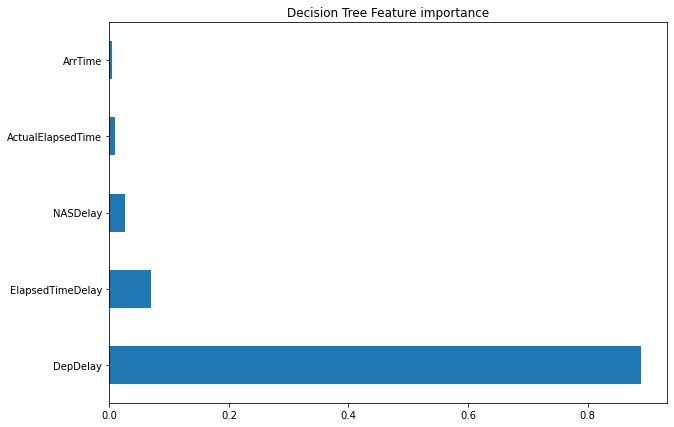

In [287]:
i_col = X
plt.figure(figsize=(10,7))
feat_importances = pd.Series(dt_reg.feature_importances_, index = i_col.columns)
feat_importances.nlargest(5).plot(kind='barh');
plt.title("Decision Tree Feature importance")
  

RandomForest

In [269]:
rf_reg.fit(X_train,y_train)
score_test = rf_reg.score(X_test, y_test)
score_test


0.9987302015413452

In [273]:
rf_pred = rf_reg.predict(X_test)


In [271]:
%%time
print('Random Forest')
cv_r2_score_lr = cross_val_score(rf_reg,X,y,cv=5,scoring='r2')
cv_mse_score_lr = cross_val_score(rf_reg,X,y,cv=5,scoring='neg_mean_squared_error')
print(cv_r2_score_lr)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_score_lr)))
print(cv_mse_score_lr)
print("Mean 5-Fold MSe: {}".format(np.mean(cv_mse_score_lr)))


Random Forest
[0.99745909 0.99918894 0.99381481 0.99931339 0.99881004]
Mean 5-Fold R Squared: 0.9977172546962768
[-16.51349612  -2.76951661 -15.79335981  -2.14561353  -4.42631797]
Mean 5-Fold MSe: -8.329660806000003
Wall time: 6min 48s


In [274]:
PrintActualPredicted(rf_pred,y_test)

,Actual,Predicted
1176355,5.00,5.0
692941,50.00,50.0
1864368,95.40,96.0
179550,89.78,90.0
1855171,-6.00,-6.0
...,...,...
566276,9.00,9.0
1454360,123.81,124.0
47706,111.65,112.0
1285200,50.70,49.0


In [279]:
rf_pred=np.round(rf_pred,0)

In [280]:
PrintActualPredicted(rf_pred,y_test)

,Actual,Predicted
1176355,5.0,5.0
692941,50.0,50.0
1864368,95.0,96.0
179550,90.0,90.0
1855171,-6.0,-6.0
...,...,...
566276,9.0,9.0
1454360,124.0,124.0
47706,112.0,112.0
1285200,51.0,49.0


Amb StandarScaler

In [281]:
rf_reg.fit(X_SC_train,y_SC_train)
score_test = rf_reg.score(X_SC_test, y_SC_test)
score_test


0.996359013245555

In [282]:
rf_pred = dt_reg.predict(X_SC_test)


In [283]:
%%time
print('Random Forest')
cv_r2_score_lr = cross_val_score(rf_reg,X_SC,y,cv=5,scoring='r2')
cv_mse_score_lr = cross_val_score(rf_reg,X_SC,y,cv=5,scoring='neg_mean_squared_error')
print(cv_r2_score_lr)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_score_lr)))
print(cv_mse_score_lr)
print("Mean 5-Fold MSe: {}".format(np.mean(cv_mse_score_lr)))


Random Forest
[0.99665472 0.99920471 0.99412245 0.99926444 0.9987861 ]
Mean 5-Fold R Squared: 0.99760648333341
[-11.88258612  -2.67774527 -17.19584864  -2.50896453  -3.75794222]
Mean 5-Fold MSe: -7.604617356
Wall time: 7min


In [284]:
PrintActualPredicted(rf_pred,y_SC_test)

,Actual,Predicted
1740147,-22.0,-22.0
548128,40.0,40.0
1762414,14.0,14.0
1920358,221.0,222.0
700644,63.0,62.0
...,...,...
289983,59.0,59.0
46760,22.0,24.0
1412786,11.0,10.0
372747,50.0,50.0


Text(0.5, 1.0, 'Random forest Feature importance')

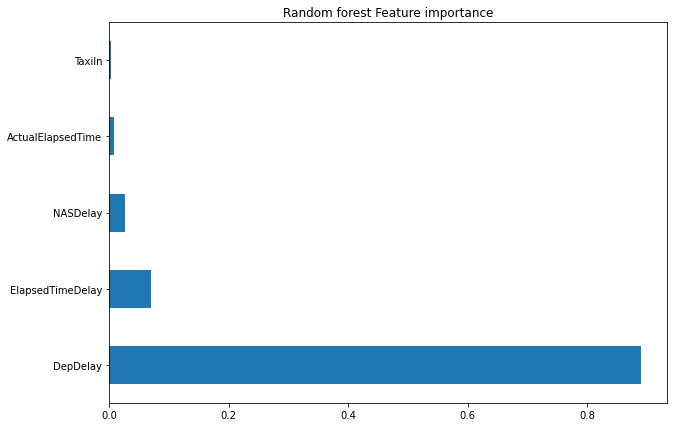

In [288]:
plt.figure(figsize=(10,7))
feat_importances = pd.Series(rf_reg.feature_importances_, index = i_col.columns)
feat_importances.nlargest(5).plot(kind='barh');
plt.title("Random forest Feature importance")
  

observem que l'unica millora en standaritzar les variables  ha estat per l'algoritme de random forest

## Nivell 3

### Exercici 6

No utilitzis la variable DepDelay a l’hora de fer prediccions

In [291]:
X_3 =X.drop('DepDelay',axis=1)


In [292]:
X_train, X_test, y_train, y_test = train_test_split(X_3, y)

In [293]:
lr_reg=LinearRegression()
dt_reg=DecisionTreeRegressor()
rf_reg=RandomForestRegressor()

Linear Regression

In [294]:
lr.fit(X_train,y_train)
score_test = lr.score(X_test, y_test)
score_test


0.9928172141417104

In [295]:
lr_pred = lr.predict(X_test)


In [297]:
%%time
print('Linear Regression')
cv_r2_score_lr = cross_val_score(lr,X_3,y,cv=5,scoring='r2')
cv_mse_score_lr = cross_val_score(lr,X_3,y,cv=5,scoring='neg_mean_squared_error')
print(cv_r2_score_lr)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_score_lr)))
print(cv_mse_score_lr)
print("Mean 5-Fold MSe: {}".format(np.mean(cv_mse_score_lr)))


Linear Regression
[0.99338803 0.99323012 0.99275051 0.9934668  0.99302843]
Mean 5-Fold R Squared: 0.9931727767955266
[-22.61059552 -22.57345987 -22.52252096 -22.14288952 -22.21494574]
Mean 5-Fold MSe: -22.412882320853416
Wall time: 443 ms


In [298]:
PrintActualPredicted(lr_pred,y_test)

,Actual,Predicted
974125,95.643582,98.0
987172,148.941315,149.0
1589067,2.119325,13.0
437742,37.946400,37.0
1166936,37.374358,38.0
...,...,...
1886228,64.767007,63.0
111777,31.308870,29.0
1559903,2.458812,2.0
377697,2.969026,12.0


Decision Tree

In [299]:
dt_reg.fit(X_train,y_train)
score_test = dt_reg.score(X_test, y_test)
score_test


0.982369975030337

In [300]:
dt_pred = dt_reg.predict(X_test)


In [301]:
%%time
print('Decission Tree')
cv_r2_score_lr = cross_val_score(dt_reg,X_3,y,cv=5,scoring='r2')
cv_mse_score_lr = cross_val_score(dt_reg,X_3,y,cv=5,scoring='neg_mean_squared_error')
print(cv_r2_score_lr)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_score_lr)))
print(cv_mse_score_lr)
print("Mean 5-Fold MSe: {}".format(np.mean(cv_mse_score_lr)))


Decission Tree
[0.97475075 0.97752549 0.97920216 0.96675207 0.98432862]
Mean 5-Fold R Squared: 0.976511819439786
[-73.36305 -85.396   -60.8106  -96.7796  -59.45895]
Mean 5-Fold MSe: -75.16164
Wall time: 10.6 s


In [302]:
PrintActualPredicted(dt_pred,y_test)

,Actual,Predicted
974125,98.0,98.0
987172,149.0,149.0
1589067,7.0,13.0
437742,37.0,37.0
1166936,38.0,38.0
...,...,...
1886228,65.0,63.0
111777,29.0,29.0
1559903,9.0,2.0
377697,12.0,12.0


Text(0.5, 1.0, 'Decision Tree Feature importance')

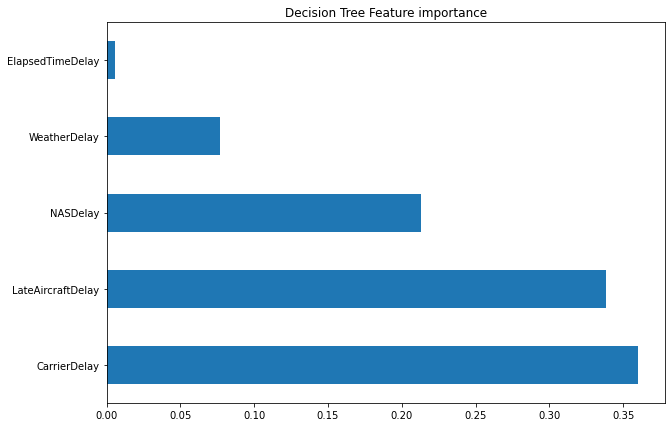

In [303]:
i_col = X_3
plt.figure(figsize=(10,7))
feat_importances = pd.Series(dt_reg.feature_importances_, index = i_col.columns)
feat_importances.nlargest(5).plot(kind='barh');
plt.title("Decision Tree Feature importance")
  

Random Forest

In [304]:
X_SC =StandardScaler().fit_transform(X_3)
X_SC_train, X_SC_test, y_SC_train, y_SC_test = train_test_split(X_SC, y)

In [305]:
rf_reg.fit(X_SC_train,y_SC_train)
score_test = rf_reg.score(X_SC_test, y_SC_test)
score_test


0.9664717097195302

In [306]:
rf_pred = dt_reg.predict(X_SC_test)


In [307]:
%%time
print('Random Forest')
cv_r2_score_lr = cross_val_score(rf_reg,X_SC,y,cv=5,scoring='r2')
cv_mse_score_lr = cross_val_score(rf_reg,X_SC,y,cv=5,scoring='neg_mean_squared_error')
print(cv_r2_score_lr)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_score_lr)))
print(cv_mse_score_lr)
print("Mean 5-Fold MSe: {}".format(np.mean(cv_mse_score_lr)))


Random Forest
[0.9817092  0.98779349 0.9840952  0.97492725 0.9915996 ]
Mean 5-Fold R Squared: 0.9840249493283288
[-63.16621426 -40.17584537 -47.11453464 -82.0499802  -23.82732284]
Mean 5-Fold MSe: -51.266779463
Wall time: 10min 31s


In [308]:
PrintActualPredicted(rf_pred,y_SC_test)

,Actual,Predicted
1156715,0.0,28.0
1883591,15.0,57.0
633577,0.0,10.0
1672645,15.0,41.0
1172358,0.0,-1.0
...,...,...
1090433,0.0,3.0
317916,0.0,30.0
1205793,0.0,-4.0
530551,0.0,30.0


Text(0.5, 1.0, 'Random forest Feature importance')

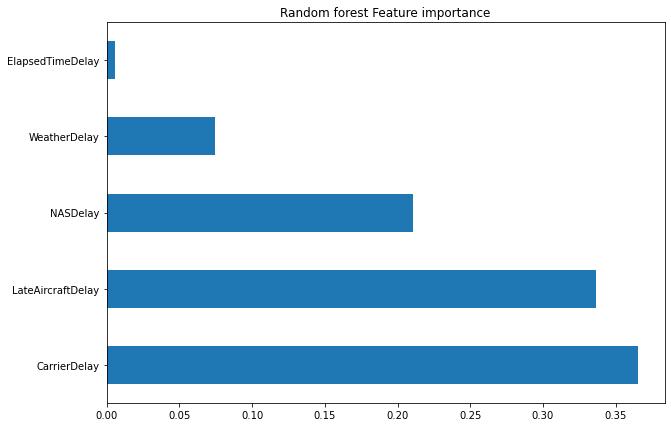

In [309]:
plt.figure(figsize=(10,7))
feat_importances = pd.Series(rf_reg.feature_importances_, index = i_col.columns)
feat_importances.nlargest(5).plot(kind='barh');
plt.title("Random forest Feature importance")
  

Conclusió: al treure la variable  DepDelay que es la que mes correlació tenia ambel taget les metriques han enpijorat bastant.
Durant tot el procés  les aplicacions realitzades per orientar-me en l'elecció de les variables  i el seu processament no han resultat eficaçes.Caldria fer un estudi en profunditat per poder treure'ls-hi mes rendiment o rellevancia.